In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from tqdm.notebook import tqdm

Let us create the Gaussian distribution

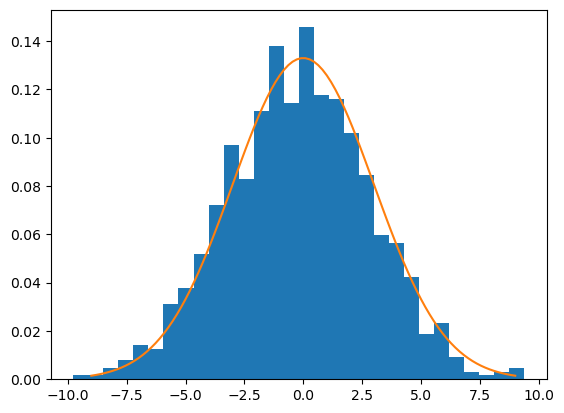

In [2]:
mean = 0
sigma = 3
N = 1000 #numbers of samples
N_tot = 10000#number of time i make the integral

gauss = scipy.stats.norm(loc=0, scale=sigma) #loc= mean ; scale= sigma
plt.hist(gauss.rvs(N), density = True, bins=30) 
plt.plot(np.linspace(-3*sigma,3*sigma,100), gauss.pdf(np.linspace(-3*sigma,3*sigma,100)))


The line command:
   - gauss = scipy.stats.norm(loc=0, scale=sigma)
   - gauss.rvs(N) , it extract numbers from gauss distribution
   
allowed us to generate random number that follow a gaussian distribution

### Let us compute the integral:

$$\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4.$$

Let us consider only the histogram from 0 to infinity

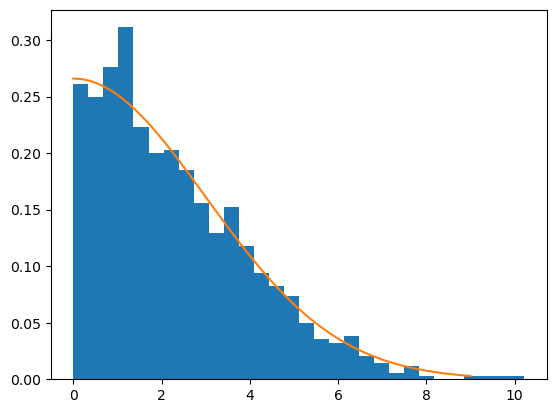

In [3]:
halfgauss = scipy.stats.halfnorm(loc=0, scale=sigma) #loc= mean ; scale= sigma
plt.hist(halfgauss.rvs(N), density = True, bins=30)
plt.plot(np.linspace(0*sigma,3*sigma,100), halfgauss.pdf(np.linspace(0*sigma,3*sigma,100)))

#plt.hist(np.abs(gauss.rvs(), density = True, bins=30)--> np.abs will consider the absolute value.

Now I use the Monte Carlo method and check the result

In [4]:
def empirical_integral(sigma,N):
    gauss = scipy.stats.norm(loc=0, scale=sigma) #loc= mean ; scale= sigma
    sample = np.abs(gauss.rvs(N))
    return sigma*np.sqrt(np.pi/2)*np.mean(sample**3) #f(x)=x**3 --> xi**3

def real_integral(sigma):
    return 2*sigma**4

print(empirical_integral(sigma, N))
print(real_integral(sigma))

184.0297031865737
162


Let's understand if the result converge with number of samples

val = np.unique(np.logspace(0,6,100,dtype=int))
results = np.array([empirical_integral(sigma,N) for N in tqdm(val)])

plt.axhline(real_integral(sigma),c='red')
plt.plot(val,results)
plt.loglog()
plt.show()

Now I will plot the result

In [5]:
results = np.zeros(N)
for i in range(N):
    results[i] = empirical_integral(sigma,N)

val = np.unique(0,60,)
plt.axhline(real_integral(sigma),c='red')
plt.plot(val,results)

plt.show()

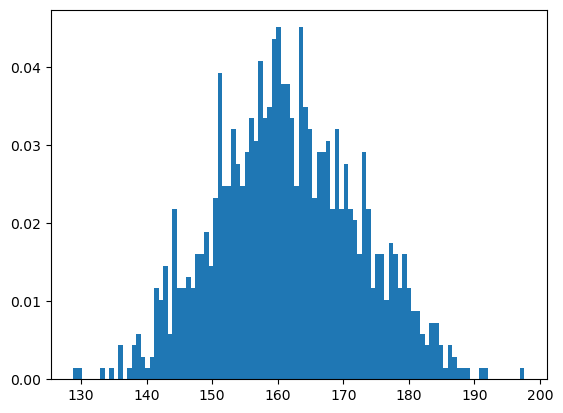

In [6]:
plt.hist(results,density = True, bins=100);

In [7]:
mean = np.average(results)
std = np.std(results, ddof=1)